# Explore Buoyancy $N$

In [1]:
# imports
from importlib import reload

import numpy as np

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils

# Load up

In [2]:
line = '90'
perc = 98.

In [4]:
grid_outliers, grid_tbl, ds = grid_utils.gen_outliers(line, perc)
clusters.generate_clusters(grid_outliers)

Found 386 unique clusters


## Fill

In [5]:
grid_utils.fill_in_grid(grid_tbl, ds)

## Stats

In [7]:
cstats = clusters.cluster_stats(grid_outliers)

# Explore

## Max SO > 1

In [8]:
sogt1 = cstats.max_SO > 1.

### Cut

In [11]:
keep = np.zeros(len(grid_outliers), dtype=bool)
for cluster_ID in np.where(sogt1)[0]:
    keep[grid_outliers.cluster.values == cluster_ID] = True
sogt1_outliers = grid_outliers[keep].copy()

In [12]:
sogt1_outliers.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,z,CT,SA,sigma0,SO,N,chla,cluster
782,0,32958,15,18,277.438868,99.488491,2017-03-14 02:17:03,-118.227115,10,15.488374,33.434623,24.549290,1.116404,7.360446,0.285907,0
783,0,32959,15,18,276.052619,98.976982,2017-03-14 03:41:20,-118.217615,10,15.243413,33.434927,24.603163,1.105516,6.704290,0.271055,0
788,0,32964,15,19,298.647665,99.616858,2017-03-14 15:53:33,-118.129770,10,14.946715,33.443485,24.673905,1.189120,7.679979,0.324720,0
789,0,32965,13,19,292.036344,99.696970,2017-03-14 18:54:13,-118.106223,10,14.787911,33.351972,24.638233,1.158375,13.925959,0.397494,0
790,0,32966,13,17,309.040496,99.794239,2017-03-14 21:51:29,-118.080510,10,15.265308,33.331187,24.519477,1.237211,13.226413,0.369575,0


### Control

In [13]:
sogt1_control = np.array( grid_utils.grab_control_values(sogt1_outliers, grid_tbl, 'N'))

In [32]:
srt_control = np.sort(sogt1_control[np.isfinite(sogt1_control)])
y_cdf = np.arange(srt_control.size)/srt_control.size

### CDF

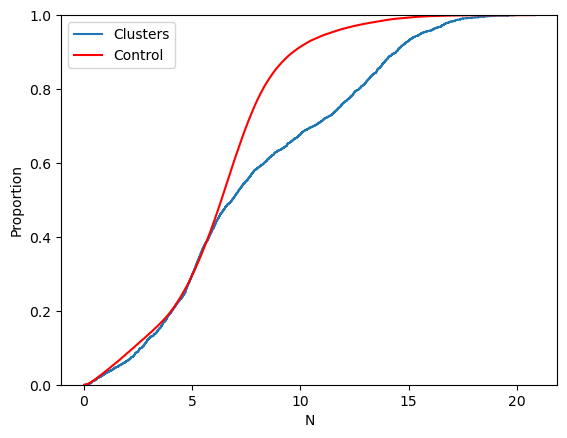

In [33]:
plt.clf()
ax = plt.gca()

# Clusters
sns.ecdfplot(x=sogt1_outliers.N, ax=ax, label='Clusters')
#sns.ecdfplot(x=sogt1_control, ax=ax, label='Control')
ax.plot(srt_control[::50], y_cdf[::50], label='Control', color='r')

ax.legend()
plt.show()

# But is $N$ highest in the upper 50m?

<Axes: xlabel='z', ylabel='Count'>

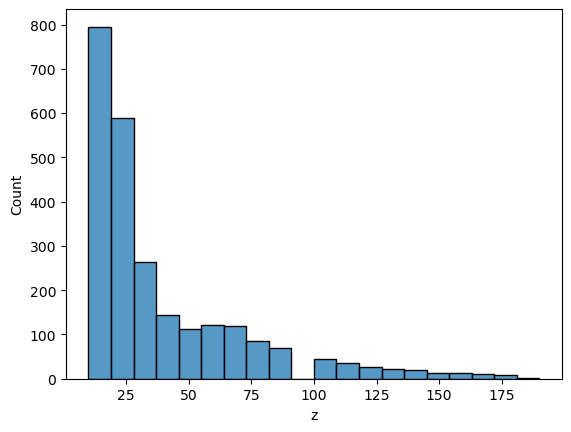

In [68]:
sns.histplot(sogt1_outliers, x='z',bins=20)

## Restrict control to $z<30$ and lon>-119.

In [79]:
shallow = (grid_tbl.z < 30.) & (grid_tbl.lon > -119.)

In [80]:
reload(grid_utils)
sogt1_shallow_control = np.array( grid_utils.grab_control_values(sogt1_outliers, grid_tbl[shallow], 'N'))

In [81]:
srt_shallow_control = np.sort(sogt1_shallow_control[np.isfinite(sogt1_shallow_control)])
y_cdf2 = np.arange(srt_shallow_control.size)/srt_shallow_control.size

In [82]:
inshore = sogt1_outliers.lon > -119.

In [84]:
highest = sogt1_outliers.SO > 1.

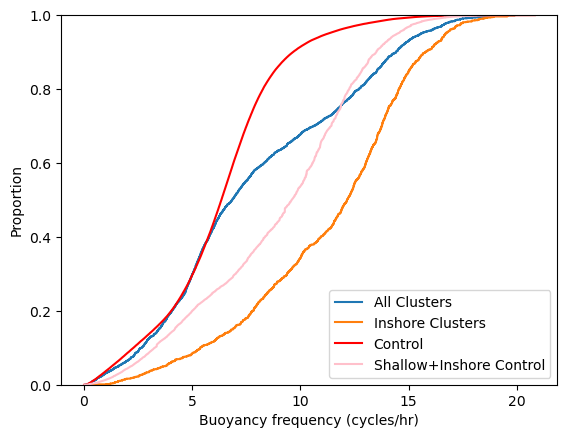

In [87]:
plt.clf()
ax = plt.gca()

# Clusters
sns.ecdfplot(x=sogt1_outliers.N, ax=ax, label='All Clusters')
sns.ecdfplot(x=sogt1_outliers[inshore].N, ax=ax, label='Inshore Clusters')
#sns.ecdfplot(x=sogt1_outliers[inshore & highest].N, ax=ax, label='Inshore Clusters + SO>1')
#sns.ecdfplot(x=sogt1_control, ax=ax, label='Control')
ax.plot(srt_control[::50], y_cdf[::50], label='Control', color='r')
ax.plot(srt_shallow_control[::50], y_cdf2[::50], label='Shallow+Inshore Control', color='pink')

#
ax.set_xlabel('Buoyancy frequency (cycles/hr)')

ax.legend()
plt.show()

In [86]:
sogt1_outliers[inshore]

,depth,profile,row,col,doxy,doxy_p,time,lon,z,CT,SA,sigma0,SO,N,chla,cluster
782,0,32958,15,18,277.438868,99.488491,2017-03-14 02:17:03,-118.227115,10,15.488374,33.434623,24.549290,1.116404,7.360446,0.285907,0
783,0,32959,15,18,276.052619,98.976982,2017-03-14 03:41:20,-118.217615,10,15.243413,33.434927,24.603163,1.105516,6.704290,0.271055,0
788,0,32964,15,19,298.647665,99.616858,2017-03-14 15:53:33,-118.129770,10,14.946715,33.443485,24.673905,1.189120,7.679979,0.324720,0
789,0,32965,13,19,292.036344,99.696970,2017-03-14 18:54:13,-118.106223,10,14.787911,33.351972,24.638233,1.158375,13.925959,0.397494,0
790,0,32966,13,17,309.040496,99.794239,2017-03-14 21:51:29,-118.080510,10,15.265308,33.331187,24.519477,1.237211,13.226413,0.369575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76644,3,54688,17,26,245.219667,98.169935,2023-03-05 08:20:07,-118.793105,40,12.393411,33.503819,25.238607,0.927787,4.135160,0.654500,47
76645,3,54689,17,26,245.676259,98.300654,2023-03-05 11:14:44,-118.764758,40,12.410924,33.528017,25.253835,0.930018,2.906091,0.699750,47
81682,4,38775,20,22,267.896893,98.458304,2018-08-11 00:36:25,-117.850257,50,14.292941,33.626413,24.952117,1.054361,8.056167,0.195727,9
81683,4,38776,20,22,268.697616,98.808690,2018-08-11 03:33:38,-117.809720,50,14.328521,33.654271,24.965914,1.058480,8.307900,0.325332,9


----


# Calculate $N$

In [4]:
ds.sigma0

<xarray.DataArray 'sigma0' (depth: 50, profile: 54842)>
array([[24.06949374, 24.02510192, 24.05058573, ..., 24.40822373,
        24.47847005, 24.50760209],
       [24.53071978, 24.42085232, 24.40613009, ..., 25.03809127,
        24.9720049 , 24.91478408],
       [24.87939168, 24.70105013, 24.72793154, ..., 25.31719505,
        25.14768034, 25.27253915],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 ... 54836 54837 54838 54839 54840 54841
    lat      (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon      (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    lat_uv   (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon_uv   (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    time     (profile) datetime64[ns] 2006-10-19T17:51:00 ... 2023-03-20T15:4...
    time_uv  (profile) datetime64[ns] 2006-10-19T17:41:00 ... 2023-03-20T15:3...
  * depth    (depth) int32 10 20 30 40 50 60 70 ... 440 450 460 470 480 490 500
Attributes:
    units:      kg/m^3
    long_name:  potential density anomaly

In [19]:
dsigmadz, _ = np.gradient(ds.sigma0.data, 10.)

In [20]:
dsigmadz.shape

(50, 54842)

In [21]:
dsigmadz.data[0,0]

0.0461226030873604

In [22]:
ds.sigma0.data[0:2, 0]

array([24.06949374, 24.53071978])

In [25]:
(24.530719-24.06949)/10.

0.0461229000000003